# DS 3000 - Assignment 7

**Student Name**: Julia Knopp

**Date**: October 22, 2023


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

In [123]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [124]:
pip install scipy --upgrade

Note: you may need to restart the kernel to use updated packages.


## Question 1: Loading Data (50 pts)

Write python code to answer the questions below and ensure that you round all numeric calculations to 2 decimal places. 

(0pts) Load the attached data into a pandas dataframe: diamonds.csv Download diamonds.csv 
This dataset contains the price of diamonds based on various attributes. For more information about the variables, read the description on kaggle.comLinks to an external site.

(5 pts) Select any two variables of your choice and explain its statistical summary, e.g. mean, median, min, max, etc.
Note: you can use the .describe() method from the dataframe to obtain the descriptive statistics, or any suitable approach.

(5 pts) Create a bar chart that shows the frequency of diamonds grouped by cut. Explain the chart.

(5 pts) Create a scatterplot that shows the relationship between carat and price. Explain the chart and comment on the relationship between the variables.

(10 pts) Calculate the Pearson Correlation coefficient of carat and price. Explain the results and discuss the strength of the correlation.

(15 pts) Create a histogram (or boxplot) that shows the distribution of prices based on the quality of the cut. Explain the charts and skew.
Note: this question is asking you to show the distribution of diamond prices for each cut. There should be a separate histogram/boxplot for each cut.

(10 pts) Using a 2-sample t-test**, determine if there is a statistical difference between the price of diamonds with a cut that is considered:
'Good' vs 'Very Good'
'Premium' vs 'Ideal'
**set alpha to 5% i.e. 0.05.

### 1. (0pts) Load the attached data into a pandas dataframe: diamonds.csv  
This dataset contains the price of diamonds based on various attributes. For more information about the variables, read the description on kaggle.com

In [125]:
# load the csv file into a pandas dataframe
diamonds_df = pd.read_csv("diamonds.csv")

# remove the indexing column
diamonds_df = diamonds_df.drop('Unnamed: 0', axis=1)

# get info about the dataframe
diamonds_df.info()

# show the first ten results
diamonds_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


### 2. (5 pts) Select any two variables of your choice and explain its statistical summary, e.g. mean, median, min, max, etc. 
Note: you can use the .describe() method from the dataframe to obtain the descriptive statistics, or any suitable approach.


In [126]:
# summarize the price variable using the describe method
price_summary = diamonds_df['price'].describe()
# round the summary to two decimal points
price_summary = price_summary.round(2)

# find the price median value
price_median = diamonds_df['price'].median()

# find price range
price_range = diamonds_df['price'].max() - diamonds_df['price'].min()

# find price mode
price_mode = diamonds_df['price'].mode().iloc[0]

# print everything explaing the statistical summary
print('Price Statistical Summary: \nmedian   ',
      price_median, '\nmode     ', price_mode, '\nrange    ', price_range, '\n', price_summary)

Price Statistical Summary: 
median    2401.0 
mode      605 
range     18497 
 count    53940.00
mean      3932.80
std       3989.44
min        326.00
25%        950.00
50%       2401.00
75%       5324.25
max      18823.00
Name: price, dtype: float64


#### Price Statistical Summary Recap
From the above, for the variable of price, the minimum value is 326 and the maximum is 18823, making the range 18497, as calculated. Additionally, the mean (average) is 3932. The median value is 2401. The mode for the variable is 605.

In [127]:
# summarize the x variable using the describe method
depth_summary = diamonds_df['depth'].describe()
# round the summary to two decimal points
depth_summary = depth_summary.round(2)

# find depth median value
depth_median = diamonds_df['depth'].median()

# find depth range
depth_range = diamonds_df['depth'].max() - diamonds_df['depth'].min()

# find depth mode
depth_mode = diamonds_df['depth'].mode().iloc[0]

# print statistical summary findings for the diamond depth
print('Depth Statistical Summary:\nmedian   ',
      depth_median, '\nrange    ', depth_range, '\nmode     ', depth_mode, '\n', depth_summary)

Depth Statistical Summary:
median    61.8 
range     36.0 
mode      62.0 
 count    53940.00
mean        61.75
std          1.43
min         43.00
25%         61.00
50%         61.80
75%         62.50
max         79.00
Name: depth, dtype: float64


#### Depth Statistical Summary Recap
To summarize the findings, the median depth is 61.8. The minimum value is 43 and the max is 79, meaning the range is 36, as calculated. The mode of this data is 62 and the mean is very similar at 61.75. The standard deviation is relatively small at 1.43.

### 3. (5 pts) Create a bar chart that shows the frequency of diamonds grouped by cut. 
Explain the chart.

<function matplotlib.pyplot.show(close=None, block=None)>

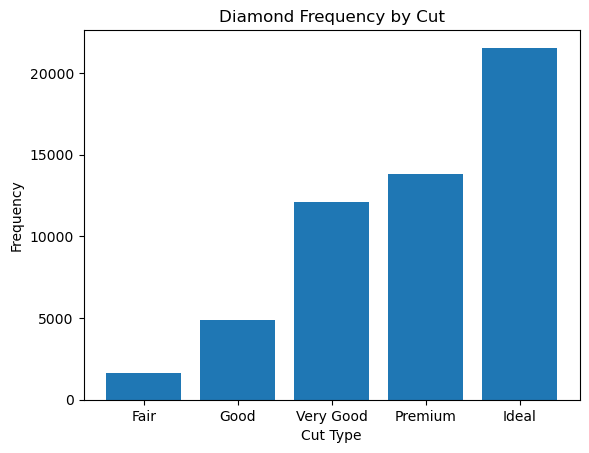

In [128]:
# group by diamond cut and find the frequency for each type
cuts_counts = diamonds_df['cut'].value_counts()

# define order of the cut types
cuts = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
# reorder the data based on the ordering
cut_counts = cuts_counts[cuts]

# create a bar chart to display cuts
plt.bar(cuts, cut_counts)
# give the plot a title
plt.title('Diamond Frequency by Cut')
# label the x axis
plt.xlabel('Cut Type')
# label the y axis
plt.ylabel('Frequency')
# show the plot
plt.show

#### Explaining the Chart
Based on the bar chart, it appears that as the quality of the diamond goes up there is also a greater frequency (fair quality has around 2000 diamonds while the ideal cut has over 20000).

### 4. (5 pts) Create a scatterplot that shows the relationship between carat and price. 
Explain the chart and comment on the relationship between the variables.

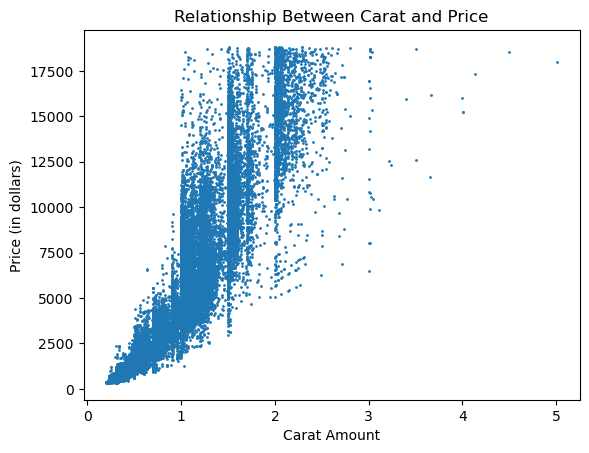

In [129]:
# create a scatterplot using carat and price
diamonds_df.plot.scatter(x=['carat'], y=['price'], s= 1)
# give the scatterpolt a name
plt.title('Relationship Between Carat and Price')
# give the x label a name
plt.xlabel('Carat Amount')
# give the y label a name
plt.ylabel('Price (in dollars)')
# show the plot
plt.show()

#### Explain the chart and comment on the relationship between the variables.
Based on the scatterplot, it appears that the data is very clustered as a lot of the plot points are overlapping. As the price and carat amount go up, the data begins to vary a little more; however, there still appears to be a very strong positive correlation. Therefore the variables of carat amount and price are very strongly positively related.

### 5. (10 pts) Calculate the Pearson Correlation coefficient of carat and price. 
Explain the results and discuss the strength of the correlation.

In [130]:
# calculate the pearson correlation coefficient of carat and price
corr, p_value = stats.pearsonr(diamonds_df['carat'], diamonds_df['price'])
# round the correlation to two decimal places
corr = corr.round(2)
# print the correlation and p_value
print('correlation:', corr)
print('p-value:', p_value)

correlation: 0.92
p-value: 0.0


#### Explain the results and discuss the strength of the correlation.
Based on the findings, the correlation is .92 and the p-value is 0. When discussing the correlation, the value of .92 is positve and very close to 1, indicating a very strong, positve correlation between carat and price. The p-value being zero indicates that it is extremely unlikely that we would see this pattern if there was no correlation.

### 6. (15 pts) Create a histogram (or boxplot) that shows the distribution of prices based on the quality of the cut. 
Explain the charts and skew. Note: this question is asking you to show the distribution of diamond prices for each cut. There should be a separate histogram/boxplot for each cut.

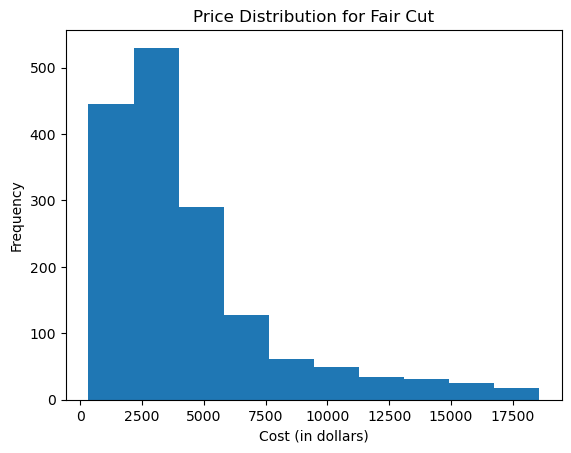

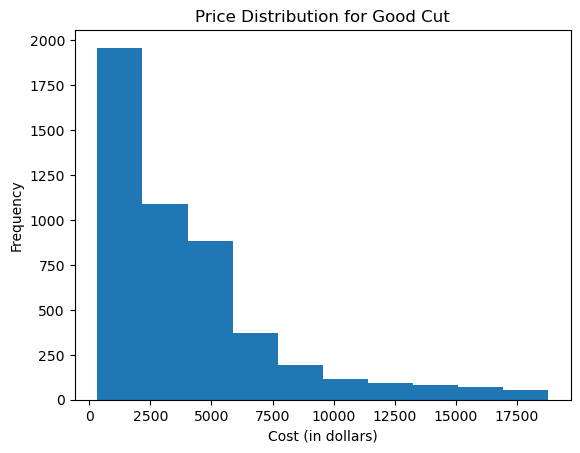

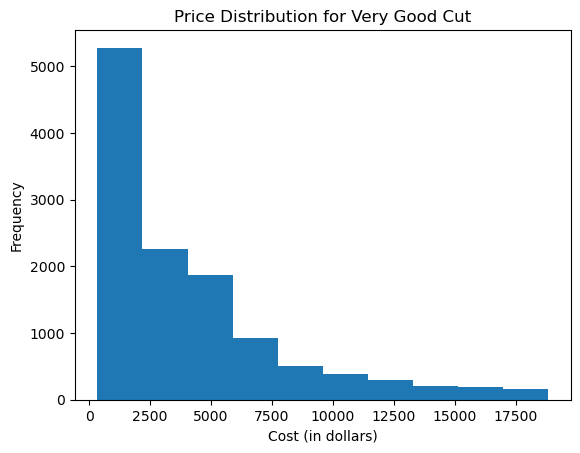

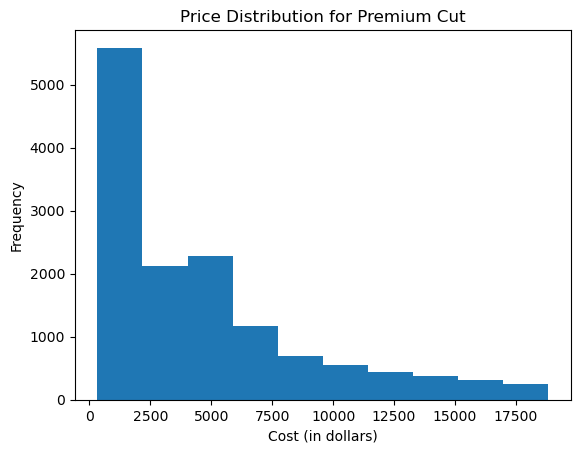

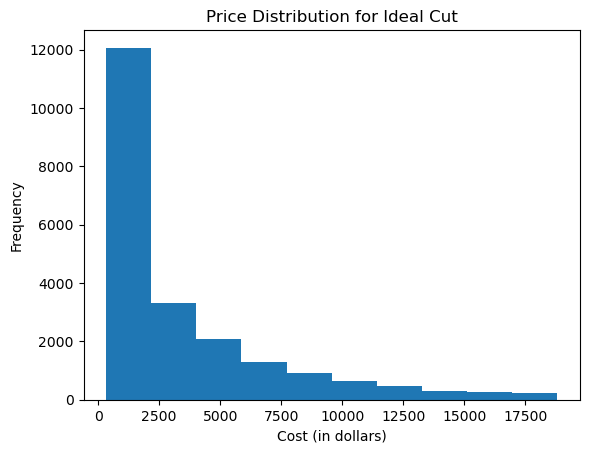

In [131]:
# get all of the different cut types
cut_types = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
# diamonds_df['cut'].unique()

# loop through all the various cut types
for cut_type in cut_types:
    # focus on a specific cut
    df_cut = diamonds_df[(diamonds_df['cut'] == cut_type)]
    # get the prices for the cut
    prices = df_cut['price']
    
    # create a histogram showing distribution of prices
    plt.hist(prices, label=cut_type)
    # give the histogram a title
    plt.title(f'Price Distribution for {cut_type} Cut')
    # give the x-label a name
    plt.xlabel('Cost (in dollars)')
    # give the y-label a name
    plt.ylabel('Frequency')
    # show the plot
    plt.show()

#### Explain the charts and skew
Based on the histograms, there are several observations that can be made.

As the cut goes up in quality, the distribution becomes farther skewed to the right. Fair cut is the only histogram distribution where the section resembling the cheapest range is not the most frequent. Once the ideal cut is reached, it is clear that a majority of the diamonds are in the least expensive range. For all of the histograms, however, there is a very clear right skew.

### 7. (10 pts) 2-sample t-test
Using a 2-sample t-test*, determine if there is a statistical difference between the price of diamonds with a cut that is considered: 
1. 'Good' vs 'Very Good' 
2. 'Premium' vs 'Ideal' 
*set alpha to 5% i.e. 0.05.

In [132]:
# sample the price of diamonds with 'good' cut
sample_good = diamonds_df[diamonds_df['cut'] == 'Good']['price']
# sample the price of diamonds with 'very good' cut
sample_very_good = diamonds_df[diamonds_df['cut'] == 'Very Good']['price']

# set alpha to 0.05 (5%)
alpha = 0.05

# carry out the 2-sample t-test for 'good' and 'very good' cuts
t_stat, p_value = stats.ttest_ind(sample_good, sample_very_good)

# if the p_value is less than the alpha we reject the null hypothesis
if(p_value < alpha):
    print('The price between the price of diamonds with good and very good cuts is statistically different.')
else:
     print('The price between the price of diamonds with good and very good cuts is not statistically different.')

The price between the price of diamonds with good and very good cuts is not statistically different.


In [133]:
# sample the price of diamonds with 'premium' cut
sample_premium = diamonds_df[diamonds_df['cut'] == 'Premium']['price']
# sample the price of diamonds with 'ideal' cut
sample_ideal = diamonds_df[diamonds_df['cut'] == 'Ideal']['price']

# set alpha to 0.05 (5%)
alpha = 0.05

# carry out the 2-sample t-test for 'premium' and 'ideal' cuts
t_stat, p_value = stats.ttest_ind(sample_premium, sample_ideal)

# if the p_value is less than the alpha we reject the null hypothesis
if(p_value < alpha):
    print('The price between the price of diamonds with premium and ideal cuts is statistically different.')
else:
     print('The price between the price of diamonds with premium and ideal cuts is not statistically different.')

The price between the price of diamonds with premium and ideal cuts is statistically different.


#### To recap the 2-sample t-test findings:

There is not a statistical difference between the price of diamonds with 'good' and 'very good' cuts.

There is a statistical difference between the price of diamonds with 'premium' and 'ideal' cuts.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
